In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# TASK 1

### df.head() to view the first few rows 

In [73]:
df=pd.read_csv(r'heart.csv')

In [74]:
df.head()

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No

### df.describe() to get statistical summaries

In [75]:
df.describe()

Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438  
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000  
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000  
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000  
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000  
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000

### df.info() to check for missing values and data types

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


### Check the distribution of the target variable (Target). 


In [77]:
df['Target'] = df['AHD'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Target'].value_counts()

Target
0    164
1    139
Name: count, dtype: int64

# Task 2

### Handle Missing Data
### Check for missing values 

In [78]:
(df.isnull().sum())

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
Target        0
dtype: int64

###  If any columns have missing values, discuss strategies for handling them 
(e.g., filling with mean/median, or dropping rows). 

In [79]:
df['Ca'].fillna(df['Ca'].median(), inplace=True)
(df.isnull().sum())

C:\Users\265278\AppData\Local\Temp\ipykernel_10772\3831925554.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ca'].fillna(df['Ca'].median(), inplace=True)


Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          2
AHD           0
Target        0
dtype: int64

In [80]:
df['Thal'].fillna(df['Thal'].mode()[0], inplace=True)
(df.isnull().sum())

C:\Users\265278\AppData\Local\Temp\ipykernel_10772\3372888545.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Thal'].fillna(df['Thal'].mode()[0], inplace=True)


Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
Target        0
dtype: int64

### Feature Engineering


### Convert categorical variables like Sex, ChestPainType, RestingECG, etc., into numeric format using encoding (e.g., one-hot encoding or label encoding)

In [ ]:
df = pd.get_dummies(df, columns=['ChestPain', 'RestECG', 'Slope', 'Thal', 'Sex', 'Age', 'Fbs', 'EXAng', 'AHD'], drop_first=True)
df.head()

### Normalize or standardize numerical columns if necessary

In [82]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()
df[['RestBP', 'Chol', 'MaxHR']] = scaler.fit_transform(df[['RestBP', 'Chol', 'MaxHR']])
df.head()

Unnamed: 0  Age  Sex     ChestPain    RestBP      Chol  Fbs  RestECG  \
0           1   63    1       typical  0.757525 -0.264900    1        2   
1           2   67    1  asymptomatic  1.611220  0.760415    0        2   
2           3   67    1  asymptomatic -0.665300 -0.342283    0        2   
3           4   37    1    nonanginal -0.096170  0.063974    0        0   
4           5   41    0    nontypical -0.096170 -0.825922    0        2   

      MaxHR  ExAng  Oldpeak  Slope   Ca        Thal  AHD  Target  
0  0.017197      0      2.3      3  0.0       fixed   No       0  
1 -1.821905      1      1.5      2  3.0      normal  Yes       1  
2 -0.902354      1      2.6      2  2.0  reversable  Yes       1  
3  1.637359      0      3.5      3  0.0      normal   No       0  
4  0.980537      0      1.4      1  0.0      normal   No       0

# TASK 3

###  Plot the distribution of key numerical features (e.g., Age, Cholesterol, MaxHR) using boxplots

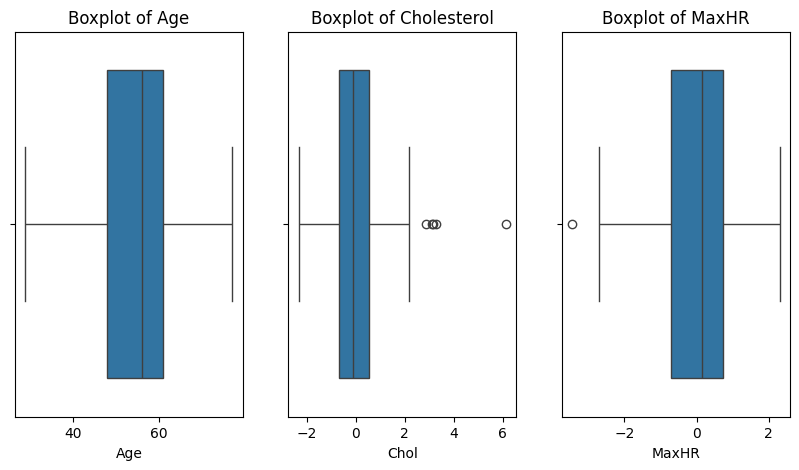

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
sns.boxplot(x=df['Age'], ax=axes[0])
axes[0].set_title('Boxplot of Age')
sns.boxplot(x=df['Chol'], ax=axes[1])
axes[1].set_title('Boxplot of Cholesterol')
sns.boxplot(x=df['MaxHR'], ax=axes[2])
axes[2].set_title('Boxplot of MaxHR')
plt.show()

# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Year', y='BasePay', data=df)
# plt.title('BasePay Distribution by Year')
# plt.show()

### Visualize the distribution of the target variable (Target), using a count plot.

C:\Users\265278\AppData\Local\Temp\ipykernel_10772\4192416648.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=df, palette='Set2')


Text(0, 0.5, 'Count')

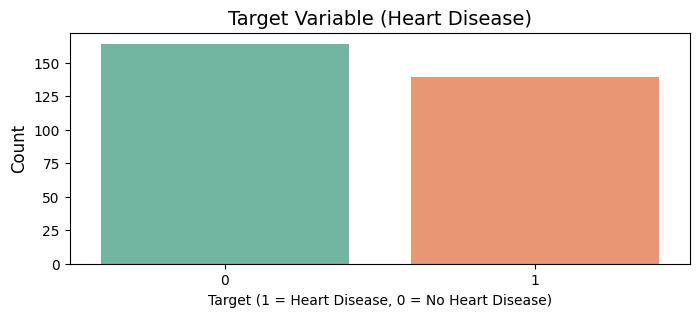

In [95]:
plt.figure(figsize=(8, 3))
sns.countplot(x='Target', data=df, palette='Set2')
plt.title('Target Variable (Heart Disease)', fontsize=14)
plt.xlabel('Target (1 = Heart Disease, 0 = No Heart Disease)')
plt.ylabel('Count', fontsize=12)

### Using a count plot for categorical features like Sex, ChestPainType, FBS, ExerciseAngina

In [102]:

categorical_features = ['Sex', 'ChestPain', 'Fbs', 'ExAng']

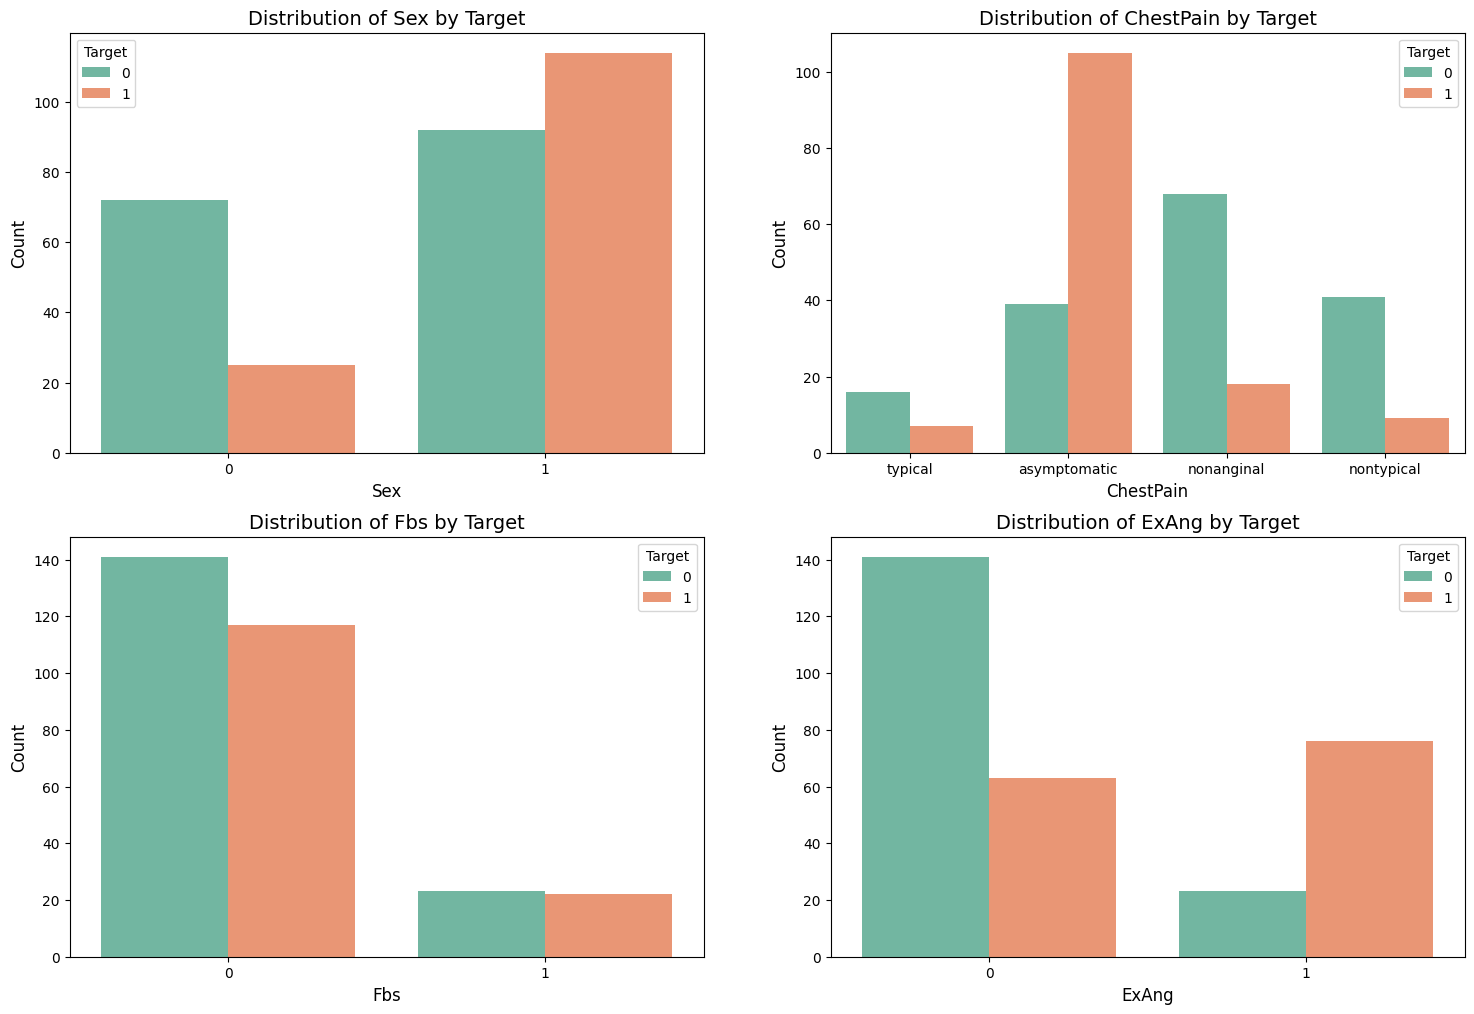

In [101]:

plt.figure(figsize=(18, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)  
    sns.countplot(x=feature, hue='Target', data=df, palette='Set2')
    plt.title(f'Distribution of {feature} by Target', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)

### Using violin plot for numerical features like Age, Cholesterol, MaxHR to see how they relate to heart disease presence

C:\Users\265278\AppData\Local\Temp\ipykernel_10772\2223979393.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Target', y=feature, data=df, palette='Set2')
C:\Users\265278\AppData\Local\Temp\ipykernel_10772\2223979393.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Target', y=feature, data=df, palette='Set2')
C:\Users\265278\AppData\Local\Temp\ipykernel_10772\2223979393.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Target', y=feature, data=df, palette='Set2')


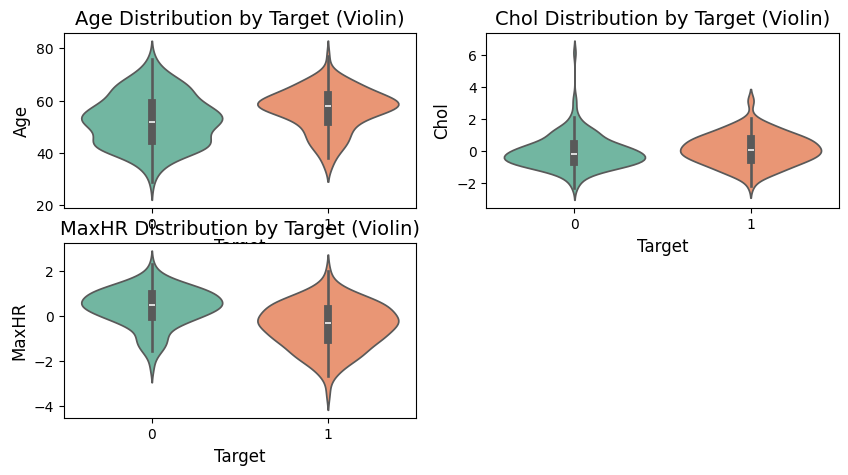

In [104]:
numerical_features = ['Age', 'Chol', 'MaxHR']
plt.figure(figsize=(10, 5))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)  
    sns.violinplot(x='Target', y=feature, data=df, palette='Set2')
    plt.title(f'{feature} Distribution by Target (Violin)', fontsize=14)
    plt.xlabel('Target', fontsize=12)
    plt.ylabel(feature, fontsize=12)

### Correlation matrix to explore relationships between numeric features

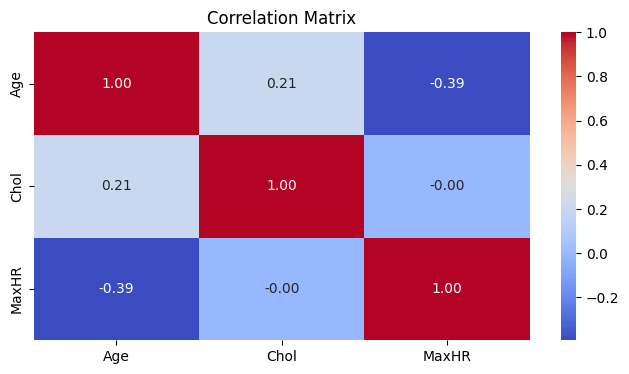

In [113]:
correlation_matrix = df[['Age', 'Chol', 'MaxHR']].corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


### Visualize correlations using a heatmap (sns.heatmap), focusing on relationships between features like cholesterol, age, and resting blood pressure

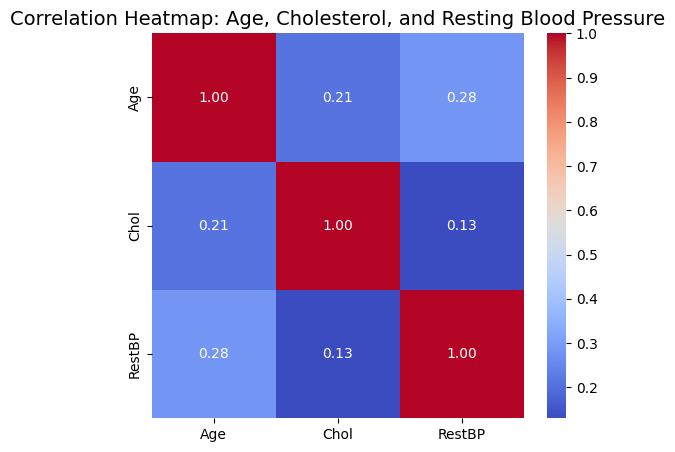

In [ ]:

correlation_matrix = df[['Age', 'Chol', 'RestBP']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Age, Cholesterol, and Resting Blood Pressure', fontsize=14)
plt.show()


# TASK 4

### Survival by gender (Male vs Female)

In [118]:
gender = df.groupby('Sex')['Target'].mean()
gender.value_counts

<bound method IndexOpsMixin.value_counts of Sex
0    0.257732
1    0.553398
Name: Target, dtype: float64>

### Survival by chest pain type (ChestPainType)

In [121]:
survival_by_chestpain = df.groupby('ChestPain')['Target'].mean()
survival_by_chestpain.value_counts

<bound method IndexOpsMixin.value_counts of ChestPain
asymptomatic    0.729167
nonanginal      0.209302
nontypical      0.180000
typical         0.304348
Name: Target, dtype: float64>

### Survival by maximum heart rate achieved (MaxHR)

In [125]:
survival_by_max_heartrate = df.groupby('ChestPain')['Target'].max()
survival_by_max_heartrate.value_counts

<bound method IndexOpsMixin.value_counts of ChestPain
asymptomatic    1
nonanginal      1
nontypical      1
typical         1
Name: Target, dtype: int64>

### Calculate average cholesterol levels for people with and without heart disease, and compare these across categories (e.g., ChestPainType)

In [132]:
avg_chol_by_cp_target = df.groupby(['ChestPain', 'Target'])['Chol'].mean().reset_index()
avg_chol_by_cp_target.rename(columns={'Chol': 'Average_Cholesterol'}, inplace=True)
avg_chol_by_cp_target.value_counts

<bound method DataFrame.value_counts of       ChestPain  Target  Average_Cholesterol
0  asymptomatic       0            -0.026305
1  asymptomatic       1             0.111141
2    nonanginal       0            -0.027348
3    nonanginal       1            -0.148827
4    nontypical       0            -0.116270
5    nontypical       1             0.324065
6       typical       0            -0.325355
7       typical       1             0.135829>

### Investigate the data set and come up with at least 5 different insights with proof

In [135]:
cp_heart = df.groupby(['ChestPain'])['Target'].mean().sort_values(ascending=False)
print("Data set for Heart Disease Rate :")
print(cp_heart)

Data set for Heart Disease Rate :
ChestPain
asymptomatic    0.729167
typical         0.304348
nonanginal      0.209302
nontypical      0.180000
Name: Target, dtype: float64


In [140]:
gender_heart = df.groupby('Sex')['Target'].mean()
print("Heart Disease Rate by Gender:")
print(gender_heart)

Heart Disease Rate by Gender:
Sex
0    0.257732
1    0.553398
Name: Target, dtype: float64


In [141]:
cp_heart = df.groupby('ChestPain')['Target'].mean()
print("Heart Disease Rate by Chest Pain Type:")
print(cp_heart)

Heart Disease Rate by Chest Pain Type:
ChestPain
asymptomatic    0.729167
nonanginal      0.209302
nontypical      0.180000
typical         0.304348
Name: Target, dtype: float64


In [142]:
chol_avg = df.groupby('Target')['Chol'].mean()
print("Average Cholesterol by Heart Disease Status:")
print(chol_avg)

Average Cholesterol by Heart Disease Status:
Target
0   -0.078404
1    0.092506
Name: Chol, dtype: float64


In [143]:
maxhr_avg = df.groupby('Target')['MaxHR'].mean()
print("Average MaxHR by Target (Heart Disease):")
print(maxhr_avg)

Average MaxHR by Target (Heart Disease):
Target
0    0.384057
1   -0.453132
Name: MaxHR, dtype: float64


### Prepare a dashboard for your findings

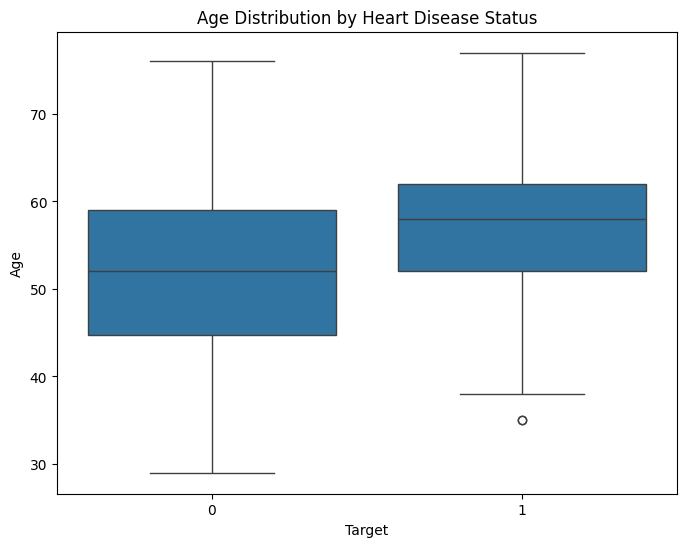

In [146]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Target', y='Age', data=df)
plt.title('Age Distribution by Heart Disease Status')
plt.show()